In [5]:
from fastai.vision.all import *
path = Path('/workspace/images')

In [6]:
(path).ls()

(#85) [Path('/workspace/images/Abramis brama'),Path('/workspace/images/Abudefduf abdominalis'),Path('/workspace/images/Abudefduf bengalensis'),Path('/workspace/images/Abudefduf saxatilis'),Path('/workspace/images/Abudefduf septemfasciatus'),Path('/workspace/images/Abudefduf sexfasciatus'),Path('/workspace/images/Abudefduf sordidus'),Path('/workspace/images/Abudefduf troschelii'),Path('/workspace/images/Abudefduf vaigiensis'),Path('/workspace/images/Acanthochromis polyacanthus')...]

In [17]:
fishes = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=parent_label,
                 item_tfms=RandomResizedCrop(336, min_scale=0.5),
                 batch_tfms=aug_transforms())
dls = fishes.dataloaders(path)

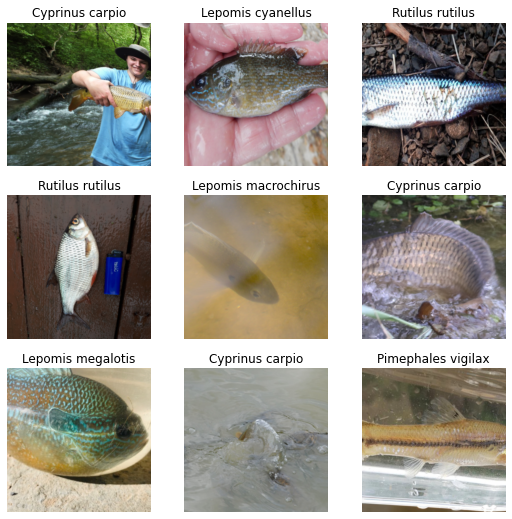

In [18]:
dls.show_batch(nrows=3, ncols=3)

In [19]:
fishes.summary(path)

Setting-up type transforms pipelines
Found 86388 items
2 datasets of sizes 69111,17277
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /workspace/images/Micropterus dolomieu/92878987.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=1024x579
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /workspace/images/Micropterus dolomieu/92878987.jpg
    applying parent_label gives
      Micropterus dolomieu
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(79)

Final sample: (PILImage mode=RGB size=1024x579, TensorCategory(79))


Setting up after_item: Pipeline: RandomResizedCrop -- {'size': (336, 336), 'min_scale': 0.5, 'ratio': (0.75, 1.3333333333333333), 'resamples': (2, 0), 'val_xtra': 0.14, 'p': 1.0} -> T

In [12]:
fns = get_image_files(path)
fns

(#86395) [Path('/workspace/images/Abramis brama/1050132.jpg'),Path('/workspace/images/Abramis brama/11473271.jpg'),Path('/workspace/images/Abramis brama/12107123.jpg'),Path('/workspace/images/Abramis brama/12776568.jpg'),Path('/workspace/images/Abramis brama/12776569.jpg'),Path('/workspace/images/Abramis brama/17832968.jpg'),Path('/workspace/images/Abramis brama/17832973.jpg'),Path('/workspace/images/Abramis brama/17832981.jpg'),Path('/workspace/images/Abramis brama/1790742.jpg'),Path('/workspace/images/Abramis brama/17933347.jpg')...]

In [13]:
failed = verify_images(fns)
failed

(#7) [Path('/workspace/images/Nocomis biguttatus/11072999.jpg'),Path('/workspace/images/Nocomis biguttatus/11073001.jpg'),Path('/workspace/images/Nocomis leptocephalus/40926637.jpg'),Path('/workspace/images/Nocomis leptocephalus/40926650.jpg'),Path('/workspace/images/Nocomis leptocephalus/40926678.jpg'),Path('/workspace/images/Nocomis leptocephalus/40926690.jpg'),Path('/workspace/images/Lepomis macrochirus/33103633.jpg')]

In [14]:
failed.map(Path.unlink);

In [20]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(1, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.763936,1.420846,0.392256,06:10


In [21]:
learn.unfreeze()

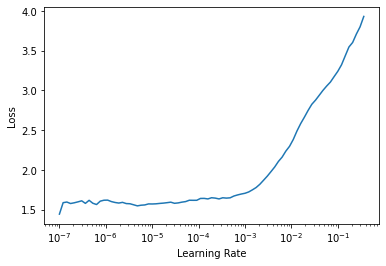

In [22]:
lr_min, lr_steep = learn.lr_find()

In [23]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 4.79e-07, steepest point: 1.10e-06


In [24]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.530346,1.323584,0.366615,07:39
1,1.430789,1.187254,0.333391,07:44
2,1.329921,1.108617,0.310008,07:43
3,1.179094,1.056386,0.296174,07:43
4,1.204790,1.040058,0.291428,07:58
5,1.139782,1.027001,0.285929,07:59


In [25]:
learn.export('families3-resnet34-6epochs.pkl')

In [27]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fit_one_cycle(1, 3e-3)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.491293,1.226938,0.341147,10:18


In [28]:
learn.unfreeze()

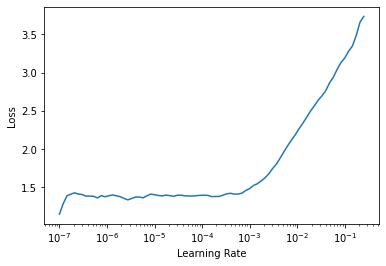

In [29]:
lr_min, lr_steep = learn.lr_find()

In [30]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 2.75e-07, steepest point: 1.91e-06


In [31]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.338274,1.141700,0.316548,12:42
1,1.171737,1.015878,0.283556,13:20
2,1.083922,0.944911,0.263877,12:48
3,0.986310,0.900853,0.253400,12:49
4,0.915682,0.876452,0.246050,12:53
5,0.943343,0.874573,0.244255,13:13


In [32]:
learn.export('families3-resnet50-6epochs.pkl')

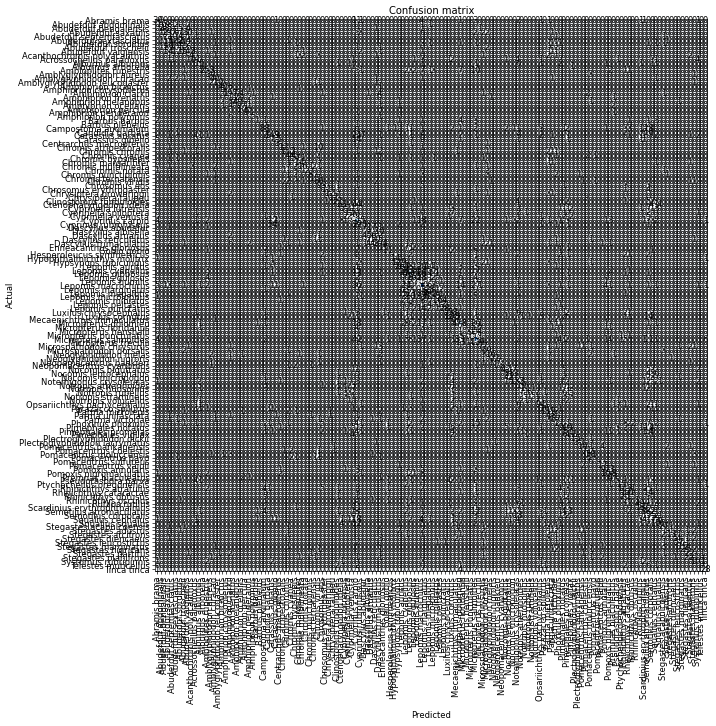

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [35]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=600)

Error in callback <function flush_figures at 0x7f4636878950> (for post_execute):


KeyboardInterrupt: 